Here, we will implement some distributed optimisation algorithms.
First, we will try the DGD Algorithm for 4 nodes. They will have optimisation objectives as follows:

$f(x) = \sum_{i = 1} ^ {4} f_i(x)
x \in \mathbb{R} ^ 4$
where

$f_i(x) = (\sum_{j \neq i}{\frac{(x ^ j) ^ 2}{6}}) + \frac{(x ^ i) ^ 2}{2}$

where $x ^ i$ is the i-th component of $x$.
We note that all the functions are convex and acheive minima identically at $(0, 0, 0, 0)$. So, in theory all $x_i$ must converge to $(0, 0, 0, 0)$

We assume the graph to be fully connected(static). The weight matrix(is doubly stochastic) will be given as : 

$W = \begin{bmatrix}
1/4 & 1/4 & 1/4 & 1/4\\
    1/4 & 1/4 & 1/4 & 1/4\\
    1/4 & 1/4 & 1/4 & 1/4\\
    1/4 & 1/4 & 1/4 & 1/4\\
    \end{bmatrix}$

The simplified DGD Algorithm works as follows:

$x_i(k + 1) = \left(sum_{j=1} ^ {4}w_{ij} \cdot x_j(k) \right)  − \alpha(k) \cdot d_i(k)$

where $x_i(k)$ is i-th node's estimate of the solution at the k-th iteration, the first term on RHS is the consensus term

$w_{ij}$ is the weight of edge j to i

$\alpha(k)$ is the learning rate at the k-th iteration

$d_i(k)$ is the subgradient for the i-th node at the k-th step at the point $x_i(k)$

We choose $\alpha(k) = 1/k$ since it is the simplest sequence satisfying the convergence requirements of the diminishing step sizes.

In our case the subgradient for node $i$ comes out to be:

$d_i ^ j(k) = \frac{1}{3} \cdot  x_i ^ j(k) \
\

    ∀ j \neq i$

$d_i ^ i(k) = x_i ^ i$

$(W \cdot X)_{ij} = \sum_{k = 1} ^ {4} w_{ik} \cdot  x_k ^ j$


In [45]:
import numpy as np

import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_theme(style='darkgrid')


In [154]:
def DGD(W:np.array,X:np.array,iter:np.int32,subgradient,alpha):
    '''
    # Weight Matrix 

        W: Doubly stochatic matrix
    
    # Intial solution vector

        X:initial solution , n*m nd array , n:number of agents and m:number of components in vector
        
        X[i] is the solution vector at the ith agent . It is a vector and not the ith componenet of 
        the vector.
        By definition of consensus step the X[1]==X[2]==....X[k]for all agent k . That is final solution
        must be same for all the agents.

    # alpha:
        Function which accepts one arguement i.e ith iteration and return constant
    # Note:
     
        Each agent may optimize different number of variables in it. 
        In general case there are n agents and m variables
        iter: Iterations

    '''

    if(X.ndim!=2):
        return "dimension of input vector wrong"
    values =[]
    values.append(X)
    n ,m= X.shape

    for i in range(iter):

        X_new = np.zeros_like(X)
        
        # Consensus step is same for all agents at any iteration. Since matrix is doubly stochatic in DGD
        
        # Do DGD step for each agent
        for ith_agent in range(0,n):
            consensus = np.zeros_like(X[ith_agent])
            for j in range(0, m):
                # print(ith_agent,j)
                # print(W[ith_agent, j],X[j])
                consensus += W[ith_agent, j]*X[j]
            D = subgradient(ith_agent,X[ith_agent])
#             print(D,consensus)
            X_new[ith_agent]= consensus - alpha(i)*D
#             print(X_new)
        values.append(X_new)
        X=X_new

    return np.array(values)

In [83]:
W = np.array([[1/4, 1/4, 1/4, 1/4], [1/4, 1/4, 1/4, 1/4],
     [1/4, 1/4, 1/4, 1/4], [1/4, 1/4, 1/4, 1/4]])
X= (np.random.rand(4,4))*10
X


array([[6.69636012, 3.20139265, 0.50897212, 4.4855078 ],
       [9.03105843, 8.14571892, 7.14523934, 3.96821517],
       [5.86817863, 5.69553548, 9.231035  , 2.10792363],
       [9.01051028, 0.64988461, 9.19891511, 3.02308598]])

In [48]:
# Assuing f(x) = x_1^2 + x_2^2 +x_3^2 +x_4^2
# and fk(x) = x_i^2 , local minimization problem at kth agent
# grad f2(x)= (0,2x_2,0,0)

def subgradient_1(i,Xi):
    # i : the local problem
    # Xi :solution at this index
    D=np.zeros_like(Xi)
    D[i] = 2*Xi[i]
    return D

def alpha(i):
    return 10/(i+1)
values= DGD(W,X,100,subgradient_1,alpha)
values[:,1].shape
# fig ,ax=plt.subplots()

# for i in range(0,4):
#     sbn.lineplot(x=np.arange(1,len(values)+1),y=np.ravel(values[:, i]),ax=ax,label=f'x{i+1}')

# ax.set_title(
#     ' DGD Algorithm \n min F(x) = $\sum{(x_i)^2}$ and $f_i(x) = (x_i)^2$ ')



(100, 4)

In [212]:
# min f(x) = (x1-1)^2 + (x2-2)^2 + (x3-3)^2 + (x4-4)^2
# and fi(x) = (xi-i)^2 , grad fi'(x)= (0,0,2(xi-i),0)
W = np.array([[1/4, 1/4, 1/4, 1/4], [1/4, 1/4, 1/4, 1/4],
     [1/4, 1/4, 1/4, 1/4], [1/4, 1/4, 1/4, 1/4]])
X= (np.random.rand(4,4))*10
def subgradient_2(i,Xi):
    D= np.zeros_like(Xi)
    D[i] = 2*(Xi[i]-(i+1))
    return D
def alpha(i):
    return 10/(i+50)
values= DGD(W,X,50,subgradient_2,alpha)



values[-1]

array([[1.0967022 , 2.10686353, 3.09189667, 4.07532383],
       [1.11709793, 2.08825039, 3.09189667, 4.07532383],
       [1.11709793, 2.10686353, 3.07589041, 4.07532383],
       [1.11709793, 2.10686353, 3.09189667, 4.06220417]])

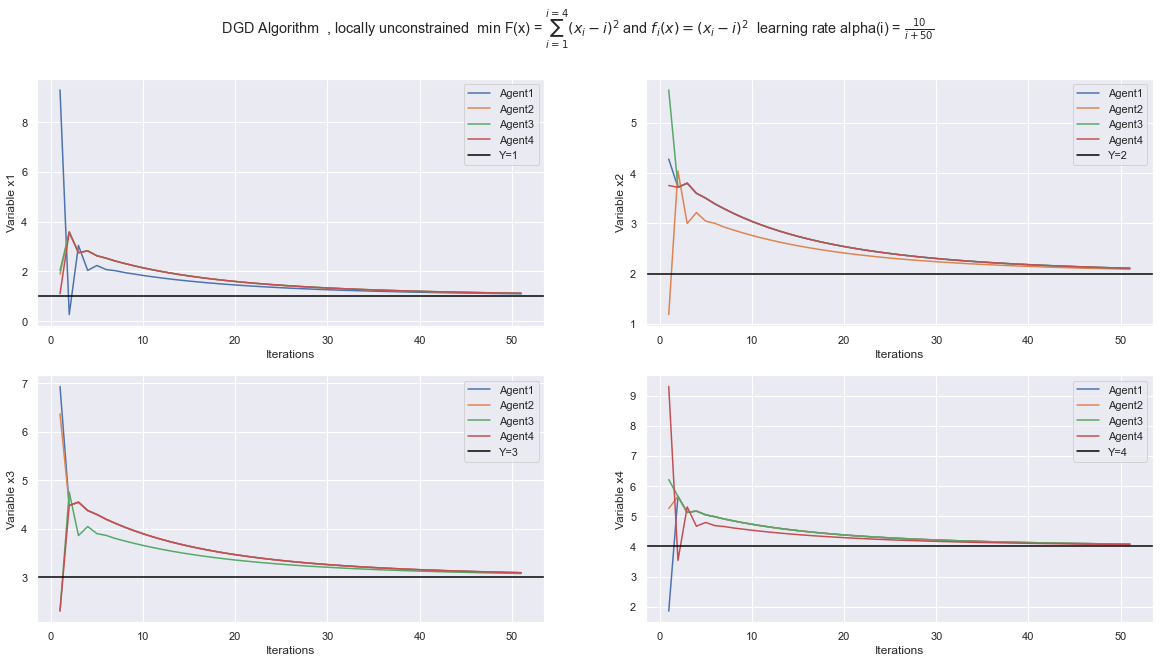

In [214]:

fig ,axes =plt.subplots(nrows=2,ncols=2,figsize=(20,10))
fig.suptitle(
        ' DGD Algorithm  , locally unconstrained  min F(x) = $\sum_{i=1}^{i=4}{(x_i-i)^2}$ and $f_i(x) = (x_i-i)^2$  learning rate alpha(i) = $ \\frac{10}{i+50}$ ')
for variable ,ax in zip(range(0,4),np.ravel(axes)):
    
# variable='x1'

    for i in range(0, 4):
        sbn.lineplot(x=np.arange(1, values.shape[0]+1),
                     y=np.ravel(values[:, i,variable]), ax=ax, label=f'Agent{i+1}')

    
    ax.axhline(y=variable+1,color='black',linestyle='-',label=f'Y={variable+1}')

    ax.set_ylabel(f'Variable x{variable+1}')
    ax.set_xlabel('Iterations')
    ax.legend()
plt.show()




